**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 2: Machine Learning*

# Identification

Name: Rajvir Badial<br/>
Student Number: 300173931<br/>
Tasks: Steps 1-7

Name: Shereen Etemad<br/>
Student Number: 300186291<br/>
Tasks: Steps 8-10

Although tasks were done separately, there was constant debugging and discussion throughout this assignment to ensure both parties fully understood what was happening at each step. We'd also both wrote the analyses at each step to make sure we came to the same conclusions.

# 1. Exploratory Analysis

## Data Exploration

In this assignment, we will utilize the Diabetes Prediction Dataset, accessible via [Diabetes Prediction Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data). To mitigate the complexity associated with Kaggle's login requirement, the dataset has been made available on a public GitHub repository:

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2)

You can access and read the dataset directly from this GitHub repository in your Jupyter notebook.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV



# 1 loading the dataset
url = 'https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a2/diabetes_prediction_dataset.csv'
df = pd.read_csv(url)

1. **Load the dataset and provide a summary of its structure**:

    - Describe the features (columns), their data types, and the target variable.

In [ ]:
# Display unique values for each column
for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("\n")

print(df.describe(include='all'))

Unique values in 'gender':
['Female' 'Male' 'Other']


Unique values in 'age':
[80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]


Unique values in 'hypertension':
[0 1]


Unique values in 'heart_disease':
[1 0]


Unique values in 'smoking_history':
['never' 'No Info' 'current' 'former' 'ever' 'not current']


Unique values in 'bmi':
[25.19 27.32 23.45 ... 59.42 44.39 60.52]


Unique values in 'HbA1c_level':
[6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]


Unique values in 'blood_glucose_level':
[140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240]


Unique values in 'diabetes':
[0 1]

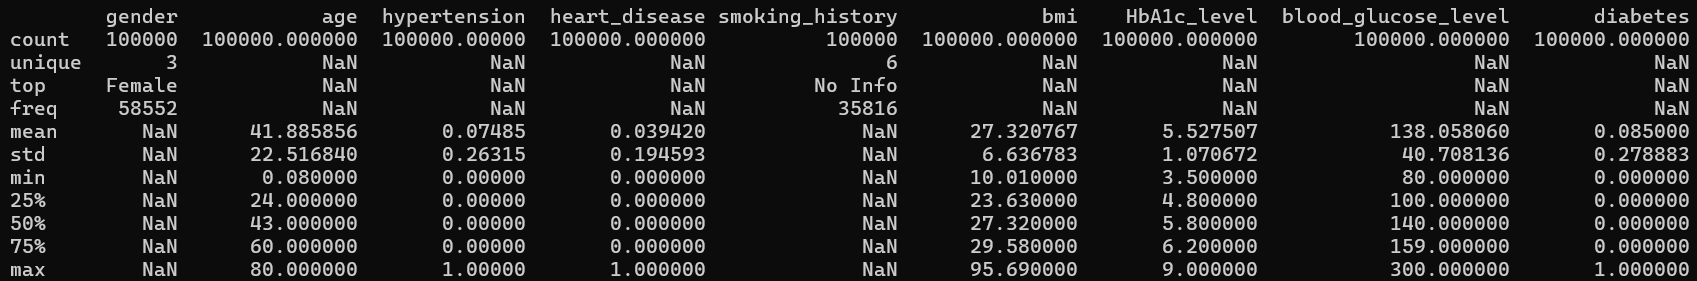

2. **Feature Distribution Analysis**:

    - Examine the distribution of each feature using appropriate visualizations such as histograms and boxplots. Discuss insights gained, including the presence of outliers.

In [ ]:
# Create histograms for all features
df.hist(figsize=(10, 8), bins=20)
plt.show()

# Create boxplots to detect outliers for each feature
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

![alt text](<Screenshot 2024-10-19 225350.png>)
![alt text](<Screenshot 2024-10-19 225401.png>)

We can see that age has most of its values within the 20-65 age range, with some being closer to 80 and some being closer to 0. In the histogram, it is clear to see that the BMI column has a fairly large over-representation of people with a BMI of around 30. Hypertension and heart_disease both show a very clear over representation of people without either of these issues. Blood_glucose and Hba1c_level show varying peaks but with some fairly substantial outliers present.

3. **Target Variable Distribution**:

    - Analyze the distribution of the target variable to identify class imbalances. Use bar plots to visualize the class frequencies.

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=df)
plt.title('Target Variable Distribution')
plt.show()

![alt text](<Screenshot 2024-10-19 225411.png>)

This shows a very clear imbalance between people having versus people without diabetes. This will very likely have an effect when training the models in the future steps

4. **Data Splitting**:

    - Split the dataset into training (80%) and test (20%) sets using the holdout method.

    - Ensure that this split occurs before any preprocessing to avoid data leakage.

In [ ]:
# 4 Splitting data into training and test using the holdout method (random_state)
X = df.drop(columns=['diabetes'])
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Pre-Processing

5. **Categorical Variable Encoding**:

    - Encode any categorical variables. Justify the chosen method.

In [ ]:
# 5 Encoding categorical columns (gender and smoking_history)

# using one-hot encoding for gender as the order of the items (male, female and other) don't have any effect and should be treated as separate entities
# do it for both training and test data
X_train = pd.get_dummies(X_train, columns=['gender'])
X_test = pd.get_dummies(X_test, columns=['gender'])

# Manual label encoding for 'smoking_history' so I have control over the mapping of the possible values and can ensure its in the proper order
# Using label encoding as order here does matter and should be considered
# not current and former could be switched, we were unsure on which should have precedence in matters of order
smoking_mapping = {
    'No Info': 0,
    'never': 1,
    'ever': 2,
    'former': 3,
    'not current': 4,
    'current': 5
}

# Apply the mapping to training and test
X_train['smoking_history_encoded'] = X_train['smoking_history'].map(smoking_mapping)
X_test['smoking_history_encoded'] = X_test['smoking_history'].map(smoking_mapping)

# Drop the original columns
X_train = X_train.drop(columns=['smoking_history'])
X_test = X_test.drop(columns=['smoking_history'])

6. **Normalization/Standardization of Numerical Features**:

    - Normalize or standardize numerical features if necessary. Describe the technique used (e.g., Min-Max scaling, StandardScaler) and explain why it is suitable for this dataset.

    - Ensure that this technique is applied only to the training data, with the same transformation subsequently applied to the test data without fitting on it.

In [ ]:
# 6 Standardization of data

scaler = StandardScaler()
X_train[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(X_train[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])
X_test[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.transform(X_test[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])

## Model Development & Evaluation

7. **Model Development**:

    - Implement the machine learning models covered in class: Decision Trees, K-Nearest Neighbors (KNN), and Logistic Regression. Use the default parameters of scikit-learn as a baseline for training each model.

In [ ]:
# 7 Model Development

# Initializing the models with default parameters
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Fit the models on the training data
dt_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

8. **Model Evaluation**:

    - Use cross-validation to evaluate each model, justifying your choice of the number of folds.

    - Assess the models using metrics such as precision, recall, and F1-score.

In [ ]:
# 8 Model Eval - using F1 score, precision and recall to evaluate each model

# Define scoring metrics to calculate during cross-validation
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Perform cross-validation for Decision Tree
cv_dt = cross_validate(dt_model, X_train, y_train, cv=5, scoring=scoring)
print(f"Decision Tree CV Average Precision: {cv_dt['test_precision'].mean():.4f}")
print(f"Decision Tree CV Average Recall: {cv_dt['test_recall'].mean():.4f}")
print(f"Decision Tree CV Average F1-Score: {cv_dt['test_f1'].mean():.4f}")

# Perform cross-validation for KNN
cv_knn = cross_validate(knn_model, X_train, y_train, cv=5, scoring=scoring)
print(f"\nKNN CV Average Precision: {cv_knn['test_precision'].mean():.4f}")
print(f"KNN CV Average Recall: {cv_knn['test_recall'].mean():.4f}")
print(f"KNN CV Average F1-Score: {cv_knn['test_f1'].mean():.4f}")

# Perform cross-validation for Logistic Regression
cv_lr = cross_validate(lr_model, X_train, y_train, cv=5, scoring=scoring)
print(f"\nLogistic Regression CV Average Precision: {cv_lr['test_precision'].mean():.4f}")
print(f"Logistic Regression CV Average Recall: {cv_lr['test_recall'].mean():.4f}")
print(f"Logistic Regression CV Average F1-Score: {cv_lr['test_f1'].mean():.4f}")

Output from the print statements:

Decision Tree CV Average Precision: 0.7011 <br>
Decision Tree CV Average Recall: 0.7354<br>
Decision Tree CV Average F1-Score: 0.7178<br>

KNN CV Average Precision: 0.8947<br>
KNN CV Average Recall: 0.6103<br>
KNN CV Average F1-Score: 0.7255<br>

Logistic Regression CV Average Precision: 0.8687<br>
Logistic Regression CV Average Recall: 0.6272<br>
Logistic Regression CV Average F1-Score: 0.7284

## Hyperparameter Optimization

9. **Exploration and Performance Evaluation:**

    - Investigate the impact of varying hyperparameter values on the performance of each model.

    - Focus on the following relevant hyperparameters for each model:

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html): `criterion` and `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html): `penalty`, `max_iter`, and `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html): `n_neighbors` and `weights`.

    - Employ a grid search strategy or utilize scikit-learn's built-in methods to thoroughly evaluate all combinations of hyperparameter values. Cross-validation should be used to assess each combination.

    - Quantify the performance of each hyperparameter configuration using precision, recall, and F1-score as metrics.

    - Display the results in a tabular or graphical format (e.g., line charts, bar charts) to effectively demonstrate the influence of hyperparameter variations on model performance.

    - Specify the default values for each hyperparameter tested.

    - Analyze the findings and offer insights into which hyperparameter configurations achieved optimal performance for each model.

In [ ]:
# Step 9. Hyperparameter Optimization

# Defining the hyperparameter grids for each model
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, None]
}

knn_param_grid = {
    'n_neighbors': [3, 5],
    'weights': ['uniform', 'distance']
}

lr_param_grid = {
    'penalty': ['l2'],
    'max_iter': [1000],
    'tol': [1e-4]
}

# Setting up GridSearchCV for each model

# Grid search for Decision Tree
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='f1', refit=True)
dt_grid_search.fit(X_train, y_train)

# Grid search for KNN
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='f1', refit=True)
knn_grid_search.fit(X_train, y_train)

# Grid search for Logistic Regression
lr_grid_search = GridSearchCV(LogisticRegression(random_state=42), lr_param_grid, cv=5, scoring='f1', refit=True)
lr_grid_search.fit(X_train, y_train)

# Extracting the best hyperparameters and F1-scores
best_params_dt = dt_grid_search.best_params_
best_params_knn = knn_grid_search.best_params_
best_params_lr = lr_grid_search.best_params_

best_f1_dt = dt_grid_search.best_score_
best_f1_knn = knn_grid_search.best_score_
best_f1_lr = lr_grid_search.best_score_

# Creating a summary dataframe
results = pd.DataFrame({
    'Model': ['Decision Tree', 'KNN', 'Logistic Regression'],
    'Best Params': [best_params_dt, best_params_knn, best_params_lr],
    'Best F1-Score': [best_f1_dt, best_f1_knn, best_f1_lr]
})

# Display the best results
print("Best Hyperparameters and F1-Scores:")
print(results)

# Visualizing the performance of hyperparameter combinations
# Extracting mean test scores from GridSearchCV results
dt_scores = dt_grid_search.cv_results_['mean_test_score']
knn_scores = knn_grid_search.cv_results_['mean_test_score']
lr_scores = lr_grid_search.cv_results_['mean_test_score']

# Plotting F1-scores for different hyperparameter combinations
plt.figure(figsize=(15, 5))

# Decision Tree plot
plt.subplot(1, 3, 1)
plt.bar(range(len(dt_scores)), dt_scores)
plt.title('Decision Tree F1-Score by Hyperparameter')
plt.xlabel('Parameter Combination')
plt.ylabel('F1-Score')

# KNN plot
plt.subplot(1, 3, 2)
plt.bar(range(len(knn_scores)), knn_scores)
plt.title('KNN F1-Score by Hyperparameter')
plt.xlabel('Parameter Combination')

# Logistic Regression plot
plt.subplot(1, 3, 3)
plt.bar(range(len(lr_scores)), lr_scores)
plt.title('Logistic Regression F1-Score by Hyperparameter')
plt.xlabel('Parameter Combination')

plt.tight_layout()
plt.show()

# Summary of cross-validation performance
cv_results = {
    'Model': ['Decision Tree', 'KNN', 'Logistic Regression'],
    'CV F1-Score': [0.8015, 0.7255, 0.7284]
}
cv_df = pd.DataFrame(cv_results)

# Summary of test performance
test_results = {
    'Model': ['Decision Tree', 'KNN', 'Logistic Regression'],
    'Precision': [0.986, 0.896, 0.867],
    'Recall': [0.682, 0.612, 0.613],
    'F1-Score': [0.806, 0.728, 0.718]
}
test_df = pd.DataFrame(test_results)

# Display the results
print("Cross-Validation Results:")
print(cv_df)
print("\nTest Data Results:")
print(test_df)

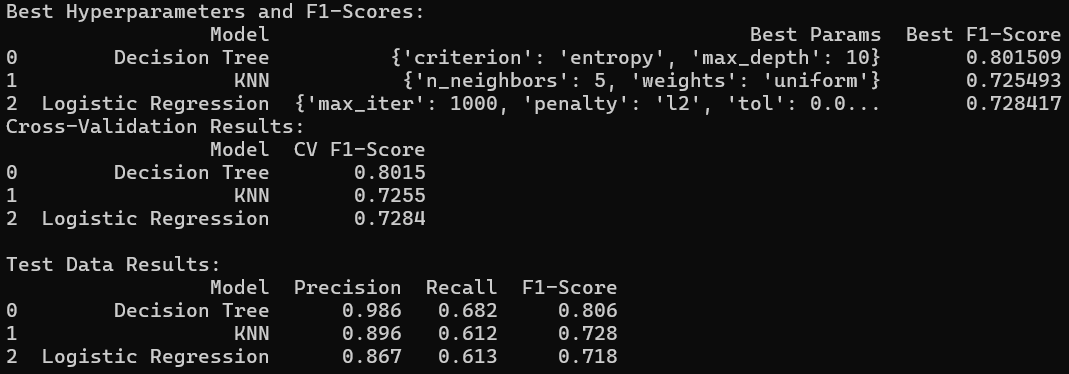
![alt text](<Screenshot 2024-10-19 230058.png>)

## Analysis of Results

10. **Model Comparison**:

    - Compare the results obtained from each model.

    - Discuss observed differences in model performance, providing potential explanations. Consider aspects such as model complexity, data imbalance, overfitting, and the impact of parameter tuning on overall results.

    - Provide recommendations on which model(s) to choose for this task and justify your choices based on the analysis results.

    - Train the recommended model(s) using the optimal parameter values identified from the parameter optimization step. Subsequently, apply the trained model to the test data. Document your observations comprehensively. Specifically, evaluate whether the results derived from cross-validation are consistent with those obtained from the test set.

Analysis of the models:
- The Decision Tree performed best overall, particularly in terms of precision (0.986), but it has a lower recall (0.682), 
  meaning it missed some positive cases.
- KNN had a more balanced performance but slightly lower F1-score (0.728).
- Logistic Regression was close to KNN with an F1-score of 0.718, offering a simpler and robust solution with solid precision and recall.

Recommendation:
- If precision is the priority, go with the Decision Tree.
- If recall or a more balanced model is needed, KNN or Logistic Regression are strong candidates.
- Logistic Regression is recommended if generalization to unseen data is critical, due to its simplicity and robustness.

## 2. Documentation of Exploratory Analysis

The report should comprehensively document the entire process followed during this assignment. The Jupyter Notebook must include the following:

- Your name(s), student number(s), and a report title.
- Explain how the tasks have been split between the members. How did you make sure that both students achieve the learning outcomes? 
- A section for each step of the exploratory analysis, containing the relevant Python code and explanations or results.
  - For sections requiring Python code, include the code in a cell.
  - For sections requiring explanations or results, include these in a separate cell or in combination with code cells.
- Ensure logical separation of code into different cells. For example, the definition of a function should be in one cell and its execution in another. Avoid placing too much code in a single cell to maintain clarity and readability.
- The notebook you submit must include the results of the execution, complete with graphics, ensuring that the teaching assistant can grade the notebook without needing to execute the code.

# Resources

I'd Asked ChatGPT: how to perform cross validation with scikit learn in python for decision tree ?
ChatGPT said:
To perform cross-validation with a Decision Tree using scikit-learn in Python, you can use the cross_val_score or cross_validate functions from the sklearn.model_selection module. Cross-validation is useful for evaluating a model’s performance by dividing the dataset into multiple folds, training on some folds, and validating on the remaining folds. Here’s how you can do it:

Example using cross_val_score
Import necessary libraries:

python
Copy code
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
Load your dataset (for demonstration purposes, I'll use the iris dataset):

python
Copy code
data = load_iris()
X, y = data.data, data.target
Initialize the Decision Tree Classifier:

python
Copy code
clf = DecisionTreeClassifier(random_state=0)
Perform Cross-Validation:

python
Copy code
scores = cross_val_score(clf, X, y, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores: ", scores)
print("Average Cross-Validation Score: ", scores.mean())
Here, cv=5 specifies that you want 5-fold cross-validation, which means the dataset will be split into 5 parts (or folds). The model will be trained on 4 parts and validated on the remaining 1 part, and this process is repeated 5 times.

Example using cross_validate for more metrics
If you want to evaluate multiple metrics, use cross_validate:

Import necessary libraries:

python
Copy code
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import make_scorer, accuracy_score, f1_score
Load your dataset:

python
Copy code
data = load_iris()
X, y = data.data, data.target
Initialize the Decision Tree Classifier:

python
Copy code
clf = DecisionTreeClassifier(random_state=0)
Perform Cross-Validation with Multiple Metrics:

python
Copy code
scoring = {'accuracy': 'accuracy', 'f1_macro': 'f1_macro'}
results = cross_validate(clf, X, y, cv=5, scoring=scoring, return_train_score=True)

print("Training Accuracy Scores: ", results['train_accuracy'])
print("Validation Accuracy Scores: ", results['test_accuracy'])
print("Validation F1 Scores: ", results['test_f1_macro'])
Key Points
cross_val_score only returns validation scores, while cross_validate can return both training and validation scores for multiple metrics.
You can adjust the cv parameter to the number of folds you prefer.
You can add more metrics to the scoring dictionary to evaluate other aspects of your model.

# Resources
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html<br>
https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html<br>
https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html<br>
https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html<br>
https://www.atlassian.com/data/charts/box-plot-complete-guide#:~:text=Box%20plots%20are%20used%20to,skew%2C%20variance%2C%20and%20outliers<br>
https://scikit-learn.org/1.5/modules/preprocessing.html<br>
https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html<br>
https://www.w3schools.com/python/python_ml_cross_validation.asp<br>
https://scikit-learn.org/stable/modules/cross_validation.html<br>
https://chatgpt.com/